###  CNN for Fashion MNIST

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kashifliaqat/Deep_Reinforcement_Learning/blob/main/CNN_FashionMNIST.ipynb) for running in Colab

In [1]:
# import relevant libraries
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import visualkeras
from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

In [2]:
# Use the keras module to import the necessary data
from tensorflow.keras.datasets import fashion_mnist
# load data as test/train and image/label sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


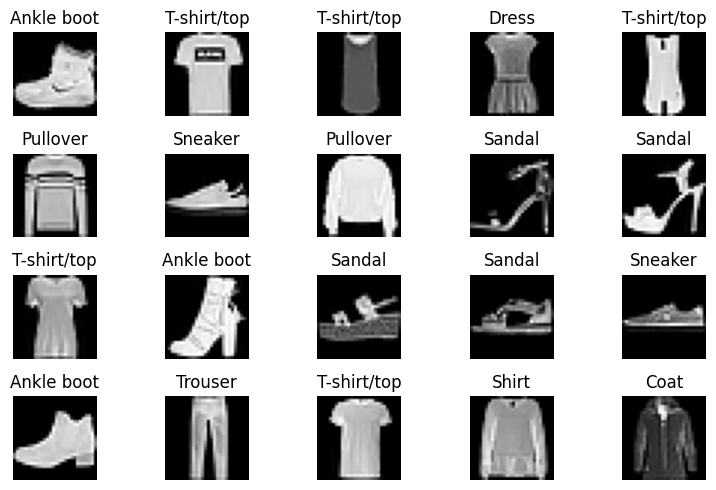

In [3]:

# Define class names as given in Fashion MNIST data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Scale pixel values to between 0 and 1
#x_train = x_train.astype('float32') / 255
#x_test = x_test.astype('float32') / 255

# Plot some examples from the dataset
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(8, 5))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(class_names[y_train[i]])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [4]:
def data_preprocessing(X, y, num_classes=10):
    label = tf.keras.utils.to_categorical(y, num_classes)
    num_images = len(y)
    #x_as_array = X[:,1:]
    x_shaped_array = X.reshape(num_images, 28, 28, 1)
    # Scale pixel values to between 0 and 1
    image = x_shaped_array / 255
    return image, label
num_classes = 10
X, y = data_preprocessing(x_train, y_train, num_classes)
X_test, y_test = data_preprocessing(x_test, y_test, num_classes)

In [5]:
Img_shape = 28
val_size = 0.25
random_state = 1234
No_epochs = 75
Batch_size = 128
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=random_state)

In [6]:
model = tf.keras.Sequential()

# First layer, which has a 2D Convolutional layer with kernel size as 3x3 and Max pooling operation
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Second layer, which has a 2D Convolutional layer with kernel size as 3x3 & ReLU activation and Max pooling operation
model.add(Conv2D(64, (3,3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Fully connected layer with ReLU activation function
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))

# Output layer with softmax activation function
model.add(Dense(10, activation=tf.nn.softmax))
model.summary()
#visualkeras.layered_view(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

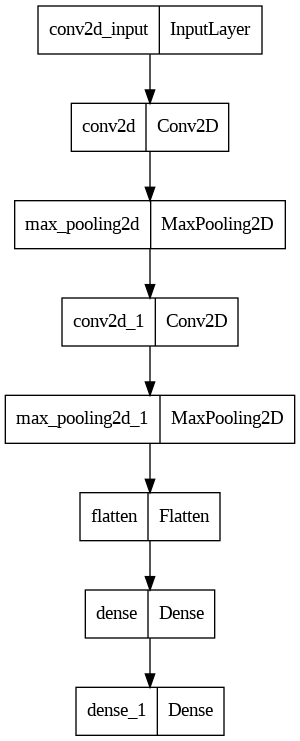

In [7]:
plot_model(model, to_file='model.png')

In [8]:
# Optimizer specified here is adam, loss is categorical crossentrophy and metric is accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/75
352/352 [==============================] - 12s 8ms/step - loss: 0.5257 - accuracy: 0.8097 - val_loss: 0.4096 - val_accuracy: 0.8533
Epoch 2/75
352/352 [==============================] - 2s 5ms/step - loss: 0.3324 - accuracy: 0.8816 - val_loss: 0.3087 - val_accuracy: 0.8891
Epoch 3/75
352/352 [==============================] - 2s 6ms/step - loss: 0.2896 - accuracy: 0.8960 - val_loss: 0.3025 - val_accuracy: 0.8871
Epoch 4/75
352/352 [==============================] - 2s 6ms/step - loss: 0.2602 - accuracy: 0.9057 - val_loss: 0.2870 - val_accuracy: 0.8953
Epoch 5/75
352/352 [==============================] - 2s 6ms/step - loss: 0.2318 - accuracy: 0.9159 - val_loss: 0.2633 - val_accuracy: 0.9041
Epoch 6/75
352/352 [==============================] - 3s 7ms/step - loss: 0.2131 - accuracy: 0.9232 - val_loss: 0.2587 - val_accuracy: 0.9060
Epoch 7/75
352/352 [==============================] - 3s 7ms/step - loss: 0.1942 - accuracy: 0.9291 - val_loss: 0.2737 - val_accuracy: 0.9017
Epoch

In [9]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.9388 - accuracy: 0.9166
Test loss: 0.9387792944908142
Test accuracy: 0.9165999889373779


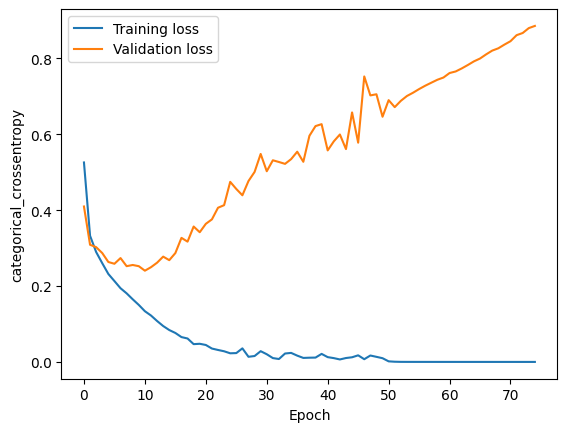

In [10]:
# Plot the training and validation loss over epochs
plt.plot(train_model.history['loss'], label='Training loss')
plt.plot(train_model.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('categorical_crossentropy')
plt.legend()
plt.show()

In [11]:
model2 = tf.keras.Sequential()

model2.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model2.add(Conv2D(64, 3, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.3))
model2.add(BatchNormalization())
model2.add(Conv2D(128, 3, padding='same', activation='relu'))
model2.add(Conv2D(128, 3, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(BatchNormalization())
model2.add(Dense(512, activation='relu'))

model2.add(Dropout(0.25))
model2.add(Dense(10, activation='softmax'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 batch_normalization (Batch  (None, 7, 7, 64)         

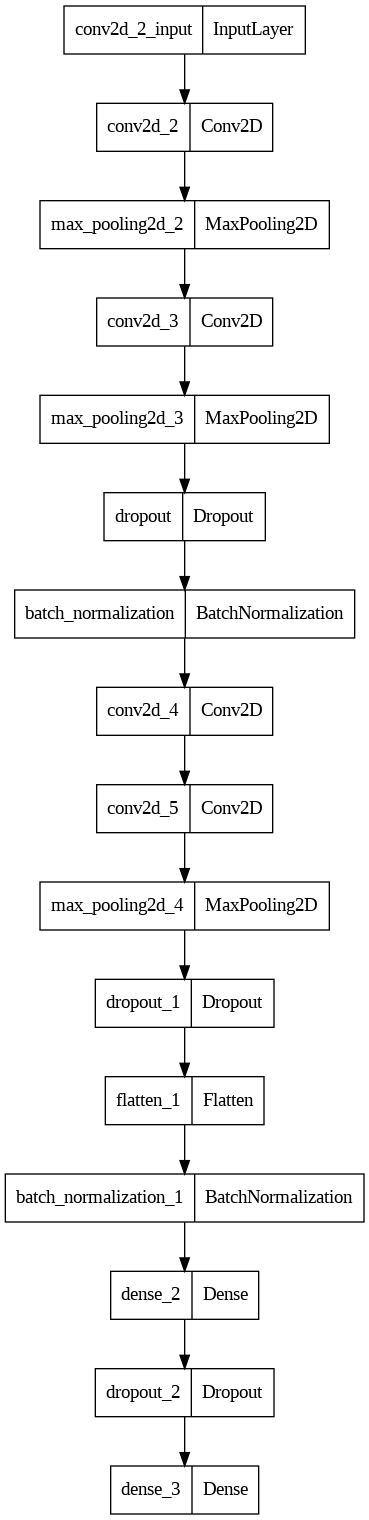

In [12]:
#visualkeras.layered_view(model2)
model2.summary()
#visualkeras.layered_view(model2)
plot_model(model2, to_file='model2.png')

In [ ]:
optimizer = Adam(learning_rate=0.001)

model2.compile(optimizer = optimizer,
              loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
train_model2 = model2.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/75
352/352 [==============================] - 14s 12ms/step - loss: 0.5916 - accuracy: 0.7863 - val_loss: 0.4228 - val_accuracy: 0.8437
Epoch 2/75
352/352 [==============================] - 4s 11ms/step - loss: 0.4030 - accuracy: 0.8514 - val_loss: 0.3619 - val_accuracy: 0.8558
Epoch 3/75
352/352 [==============================] - 3s 10ms/step - loss: 0.3546 - accuracy: 0.8661 - val_loss: 0.3076 - val_accuracy: 0.8837
Epoch 4/75
352/352 [==============================] - 3s 10ms/step - loss: 0.3185 - accuracy: 0.8828 - val_loss: 0.3213 - val_accuracy: 0.8775
Epoch 5/75
352/352 [==============================] - 4s 10ms/step - loss: 0.3001 - accuracy: 0.8878 - val_loss: 0.2677 - val_accuracy: 0.8958
Epoch 6/75
352/352 [==============================] - 4s 10ms/step - loss: 0.2837 - accuracy: 0.8943 - val_loss: 0.2543 - val_accuracy: 0.9037
Epoch 7/75
352/352 [==============================] - 4s 10ms/step - loss: 0.2680 - accuracy: 0.9012 - val_loss: 0.2461 - val_accuracy: 0.906

In [ ]:
# Evaluate the model on the test set
score = model2.evaluate(X_test, y_test, steps=math.ceil(10000/32))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(train_model2.history['loss'], label='Training loss')
plt.plot(train_model2.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('categorical_crossentropy')
plt.legend()
plt.show()